<a href="https://colab.research.google.com/github/jv-mendes07/zomato-EDA-/blob/main/Zomato%202022%20(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANÁLISE EXPLORATÓRIA DE DADOS DOS RESTAURANTES DA CIDADE DE BANGALORE LOCALIZÁVEL NA ÍNDIA.

### Importação de bibliotecas para realizar a análise exploratória de dados.

In [ ]:
# Importação das bibliotecas:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Saber a quantidade de caracteres que poderão ser vísiveis nas colunas do dataframe:
pd.get_option('max_colwidth')

50

In [ ]:
# Modificar a quantidade de caracteres que poderão ser vísiveis nas colunas do dataframe:
pd.set_option('max_colwidth', None)

In [ ]:
# Importação da base de dados que será utilizável na análise exploratória de dados:
df_restaurantes = pd.read_csv('/content/drive/MyDrive/BangaloreZomatoData.csv')
print(df_restaurantes.shape)
df_restaurantes.head()

(8923, 19)


,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-park-indiranagar,"South Indian, North Indian, Chinese, Street Food, Biryani, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indiranagar, Defence Colony, Indiranagar, Bangalore",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manchurian","Economical, Prompt Service, Hygiene, Quality Food, Reasonable Price, Quick Service",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods-indiranagar,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar Metro Station, Indiranagar, Bangalore",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, Panner Tikka, Chicken 65, Lemon Chicken, Mutton Biriyani","Boneless Chicken Biryani, Ample Seating Area, Serving Size, Family Place, Relaxed Atmosphere, Delivery Person",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyani-house-indiranagar-bangalore,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Bangalore",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambiance, Good Quantity, Excellent Food, Nice Food",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza-indiranagar,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Bangalore",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White Sauce Pasta, Pizzas","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, View, Location, Good Taste, Worth the Money",400


### (1) Tratamento dos dados.

In [ ]:
# Informações gerais do conjunto de dados que será explorável:
df_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              8923 non-null   object
 1   URL               8923 non-null   object
 2   Cuisines          8923 non-null   object
 3   Area              8923 non-null   object
 4   Timing            5820 non-null   object
 5   Full_Address      8923 non-null   object
 6   PhoneNumber       8923 non-null   object
 7   IsHomeDelivery    8923 non-null   int64 
 8   isTakeaway        8923 non-null   int64 
 9   isIndoorSeating   8923 non-null   int64 
 10  isVegOnly         8923 non-null   int64 
 11  Dinner Ratings    8923 non-null   object
 12  Dinner Reviews    8923 non-null   int64 
 13  Delivery Ratings  8923 non-null   object
 14  Delivery Reviews  8923 non-null   int64 
 15  KnownFor          258 non-null    object
 16  PopularDishes     1535 non-null   object
 17  PeopleKnownFor

In [ ]:
# Renomeação das colunas do dataframes para nomes mais intuitivos:
df_restaurantes.rename(
    columns = {'Name': 'name',
               'URL': 'url',
               'Cuisines': 'tipo_de_comida',
               'Area': 'area',
               'Timing': 'tempo',
               'Full_Address': 'endereco_completo',
               'PhoneNumber': 'numero_tel',
               'IsHomeDelivery': 'servico_de_entrega',
               'isTakeaway': 'take_away',
               'isIndoorSeating': 'jantar_interno',
               'isVegOnly': 'comida_vegana',
               'Dinner Ratings': 'avaliacao_jantar',
               'Dinner Reviews': 'qtd_avaliacoes_jantar',
               'Delivery Ratings': 'avaliacao_entrega',
               'Delivery Reviews': 'qtd_avaliacoes_entrega',
               'KnownFor': 'conhecido_por',
               'PopularDishes': 'pratos_populares',
               'PeopleKnownFor': 'pessoas_conhecem_por',
               'AverageCost': 'custo_medio'}
, inplace = True)
df_restaurantes.columns

Index(['name', 'url', 'tipo_de_comida', 'area', 'tempo', 'endereco_completo',
       'numero_tel', 'servico_de_entrega', 'take_away', 'jantar_interno',
       'comida_vegana', 'avaliacao_jantar', 'qtd_avaliacoes_jantar',
       'avaliacao_entrega', 'qtd_avaliacoes_entrega', 'conhecido_por',
       'pratos_populares', 'pessoas_conhecem_por', 'custo_medio'],
      dtype='object')

In [ ]:
# Quantidade de valores únicos da coluna 'name':
df_restaurantes.name.nunique()

5242

In [ ]:
# Quantidade de valores únicos da coluna 'area':
df_restaurantes.area.nunique()

169

In [ ]:
# Verificação dos bairros da cidade Bangalore em que há restaurantes localizados:
df_restaurantes.area.unique()

array(['Indiranagar, Bangalore', 'Ulsoor, Bangalore',
       'Jeevan Bhima Nagar, Bangalore', 'Thippasandra, Bangalore',
       'Brigade Road, Bangalore', 'Old Madras Road, Bangalore',
       'Frazer Town, Bangalore', 'KR Puram, Bangalore',
       'Marathahalli, Bangalore', 'Shanti Nagar, Bangalore',
       'Richmond Road, Bangalore', 'CV Raman Nagar, Bangalore',
       'HSR, Bangalore', 'Old Airport Road, Bangalore',
       'Domlur, Bangalore', 'Kalyan Nagar, Bangalore',
       'Kammanahalli, Bangalore', 'Shivajinagar, Bangalore',
       'Koramangala 1st Block, Bangalore', 'Brookefield, Bangalore',
       'Koramangala 6th Block, Bangalore', 'Whitefield, Bangalore',
       'MG Road, Bangalore', 'Koramangala 3rd Block, Bangalore',
       'St. Marks Road, Bangalore',
       'Garuda Mall, Magrath Road, Bangalore', 'Majestic, Bangalore',
       'Kaggadasapura, Bangalore', 'Church Street, Bangalore',
       'KBR Mall, Marathahalli, Bangalore', 'Ejipura, Bangalore',
       'Infantry Road, Ba

In [ ]:
# Quantidade de linhas do conjunto de dados em geral:
df_restaurantes.shape[0]

8923

In [ ]:
# Quantidade de linhas que contêm o nome Bangalore como referencial da cidade indiana
# para sabermos se há linhas que não têm o referencial 'Bangalore' como cidade em que o restaurante é localizado:
len(df_restaurantes.area.str.contains('Bangalore'))

8923

### Basicamente, há aproximadamente 5 mil restaurantes localizáveis dispersamente na cidade de Bangalore, e exatamente 169 bairros aos quais esses restaurantes estão localmente dispersos.

In [ ]:
# Verificação para sabermos quais colunas contêm dados nulos e qual é a quantidade presente de dados ausentes
# em tais colunas:
df_restaurantes.isnull().sum()

name                         0
url                          0
tipo_de_comida               0
area                         0
tempo                     3103
endereco_completo            0
numero_tel                   0
servico_de_entrega           0
take_away                    0
jantar_interno               0
comida_vegana                0
avaliacao_jantar             0
qtd_avaliacoes_jantar        0
avaliacao_entrega            0
qtd_avaliacoes_entrega       0
conhecido_por             8665
pratos_populares          7388
pessoas_conhecem_por      5439
custo_medio                  0
dtype: int64

## (1) Quais são os tipos de comida mais populares na cidade de Bangalore na Índia?

In [ ]:
# Quebra dos tipos de comida separáveis por vírgulas com o método split():
# expand = True quebra às divisões por vírgulas entre os elementos e os apresenta
# no formato de dataframe:
df_restaurantes.tipo_de_comida.str.split(',', expand = True)

,0,1,2,3,4,5,6,7
0,South Indian,North Indian,Chinese,Street Food,Biryani,Ice Cream,Beverages,Shake
1,Biryani,Andhra,North Indian,Seafood,None,None,None,None
2,Biryani,None,None,None,None,None,None,None
3,Pizza,Fast Food,Desserts,None,None,None,None,None
4,Burger,Fast Food,Biryani,Desserts,Beverages,None,None,None
...,...,...,...,...,...,...,...,...
8918,Fast Food,None,None,None,None,None,None,None
8919,Seafood,Mangalorean,Beverages,None,None,None,None,None
8920,Salad,Chinese,None,None,None,None,None,None
8921,Thai,Chinese,None,None,None,None,None,None


In [ ]:
# Criação de dataframes para no final realizar uma concatenação entre todos os dados
# em uma única coluna com o método concat():
df_0 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[0]]
df_1 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[1]].rename(columns = {
    1: 0
})
df_2 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[2]].rename(columns = {
    2: 0
})
df_3 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[3]].rename(columns = {
    3: 0
})
df_4 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[4]].rename(columns = {
    4: 0
})
df_5 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[5]].rename(columns = {
    5: 0
})
df_6 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[6]].rename(columns = {
    6: 0
})
df_7 = df_restaurantes.tipo_de_comida.str.split(',', expand = True)[[7]].rename(columns = {
    7: 0
})

In [ ]:
# Concat entre todos os dataframes criados anteriormente:
df_tipos_de_comida = pd.concat([df_0, df_1, df_2, df_3,
           df_4, df_5, df_6, df_7]).rename(columns = {
               0: 'tipos_de_comida'
           })
print(df_tipos_de_comida.shape)
df_tipos_de_comida.head()

(71384, 1)


,tipos_de_comida
0,South Indian
1,Biryani
2,Biryani
3,Pizza
4,Burger


In [ ]:
# Verificação de que há erros nas strings da coluna tipos_de_comida:
df_tipos_de_comida[df_tipos_de_comida.tipos_de_comida.str[0] == ' '].tipos_de_comida.to_list()

[' North Indian',
 ' Andhra',
 ' Fast Food',
 ' Fast Food',
 ' Fast Food',
 ' Beverages',
 ' Kebab',
 ' Mughlai',
 ' North Indian',
 ' Desserts',
 ' Biryani',
 ' North Indian',
 ' Wraps',
 ' Biryani',
 ' Beverages',
 ' Kebab',
 ' South Indian',
 ' Biryani',
 ' Mughlai',
 ' Burmese',
 ' Fast Food',
 ' Fast Food',
 ' Pasta',
 ' North Indian',
 ' Mughlai',
 ' Chinese',
 ' Andhra',
 ' Andhra',
 ' Fast Food',
 ' South Indian',
 ' Biryani',
 ' Street Food',
 ' North Indian',
 ' Burger',
 ' Biryani',
 ' Fast Food',
 ' Kebab',
 ' Beverages',
 ' North Indian',
 ' North Indian',
 ' North Indian',
 ' Street Food',
 ' Fast Food',
 ' North Indian',
 ' Ice Cream',
 ' Mughlai',
 ' Fast Food',
 ' North Indian',
 ' Arabian',
 ' Thai',
 ' North Indian',
 ' Fast Food',
 ' Continental',
 ' North Indian',
 ' Biryani',
 ' Mughlai',
 ' Desserts',
 ' Desserts',
 ' Sandwich',
 ' Beverages',
 ' Chinese',
 ' Fast Food',
 ' Kebab',
 ' Ice Cream',
 ' Fast Food',
 ' Italian',
 ' South Indian',
 ' Chinese',
 ' North

In [ ]:
# Correção do erro pela eliminação de espaços em branco que estão no início de cada string:
df_tipos_de_comida.tipos_de_comida = df_tipos_de_comida.tipos_de_comida.str.strip()
df_tipos_de_comida[df_tipos_de_comida.tipos_de_comida.str[0] == ' '].tipos_de_comida

Series([], Name: tipos_de_comida, dtype: object)

In [ ]:
# Agrupamento dos tipos de comida mais populares na cidade de Bangalore na Índia:
df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False)

,qtd
tipos_de_comida,
North Indian,3249
Beverages,2829
Chinese,2765
Desserts,2320
Fast Food,2173
...,...
Sindhi,1
German,1
Assamese,1


In [ ]:
# Top 10 dos tipos de comida mais populares em Bangalore na Índia:
df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).head(10)

,qtd
tipos_de_comida,
North Indian,3249
Beverages,2829
Chinese,2765
Desserts,2320
Fast Food,2173
Biryani,1987
South Indian,1644
Street Food,1089
Shake,927


In [ ]:
# Quantidade somática da coluna 'tipos_de_comida'
# para sabermos a porcentagem dos tipos de comida mais populares:
df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).qtd.sum()

28783

In [ ]:
# % do top 10 dos tipos de comida mais populares na cidade de Bangalore na Índia:
(df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).head(10) / df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).qtd.sum() * 100).round(2)

,qtd
tipos_de_comida,
North Indian,11.29
Beverages,9.83
Chinese,9.61
Desserts,8.06
Fast Food,7.55
Biryani,6.90
South Indian,5.71
Street Food,3.78
Shake,3.22


In [ ]:
# Lista do top 10 de porcentagens em um array numpy:
(df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).head(10) / df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).qtd.sum() * 100).round(2).qtd.to_numpy()

array([11.29,  9.83,  9.61,  8.06,  7.55,  6.9 ,  5.71,  3.78,  3.22,
        2.87])

In [ ]:
# Lista do top 10 dos tipos de comida mais populares em um array numpy:
(df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).head(10) / df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).qtd.sum() * 100).round(2).index

Index(['North Indian', 'Beverages', 'Chinese', 'Desserts', 'Fast Food',
       'Biryani', 'South Indian', 'Street Food', 'Shake', 'Mughlai'],
      dtype='object', name='tipos_de_comida')

In [ ]:
# Escolha da paleta de cores que será usada para a plotagem dos gráficos:
sns.color_palette('YlOrRd')

[(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),
 (0.996078431372549, 0.8065974625144174, 0.41494809688581313),
 (0.9944329104190696, 0.6371549404075355, 0.2717108804306036),
 (0.9898808150711266, 0.40955017301038066, 0.19432525951557092),
 (0.9186466743560169, 0.16113802383698578, 0.1257362552864283),
 (0.7604613610149943, 0.013194925028835056, 0.14394463667820068)]

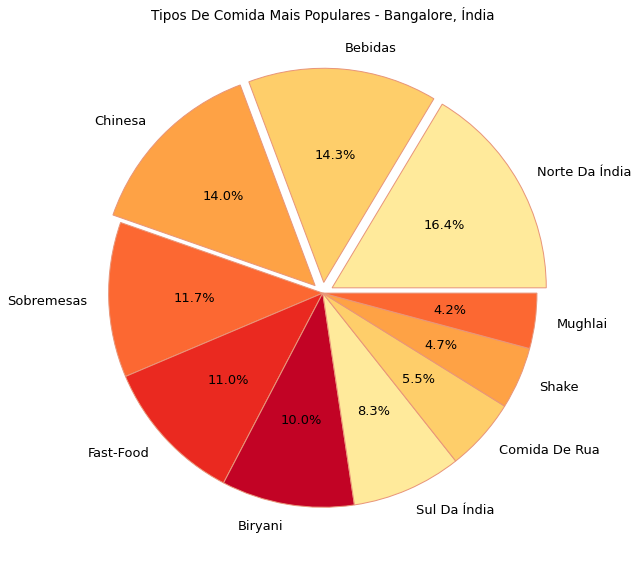

In [ ]:
# Gráfico de pizza para representar o top 10 dos tipos de comida mais populares em Bangalore, Índia:
paleta = sns.color_palette('YlOrRd')
plt.figure(figsize = (18, 8))
plt.pie(x = (df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).head(10) / df_tipos_de_comida.groupby('tipos_de_comida').agg({
    'tipos_de_comida': 'size'
}).rename(columns = {
    'tipos_de_comida': 'qtd'
}).sort_values('qtd', ascending = False).qtd.sum() * 100).round(2).qtd.to_numpy(),
labels = ['Norte Da Índia', 'Bebidas', 'Chinesa', 'Sobremesas', 'Fast-Food',
       'Biryani', 'Sul Da Índia', 'Comida De Rua', 'Shake', 'Mughlai'],
        autopct = '%1.1f%%', textprops = {'fontsize': 13, 'color' : 'k'}, colors = paleta,
        wedgeprops = {'edgecolor': 'darksalmon'}, explode = [0.05, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
plt.title('Tipos De Comida Mais Populares - Bangalore, Índia', fontsize = 13.5, color = 'k')
plt.tight_layout();

### As culinárias norte-indianas e chinesas são os tipos de comida mais populares nos restaurantes de Bangalore na Índia, juntamente às comidas de rua, o fast-food, Biryani e às comidas sul-indianas são tipos de comida também populares nos restaurantes da cidade metropolitana da Índia.

### (2) Quais são os bairros de Bangalore em que há mais restaurantes localizáveis?

In [ ]:
# Agrupamento dos bairros de Bangalore com mais restaurantes localizáveis:
df_restaurantes.groupby('area').agg({'area': 'size'}).rename(
    columns = {'area': 'qtd_restaurantes'}
).sort_values('qtd_restaurantes', ascending = False).head(10)

,qtd_restaurantes
area,
"Electronic City, Bangalore",674
"Marathahalli, Bangalore",484
"HSR, Bangalore",457
"Whitefield, Bangalore",447
"BTM, Bangalore",397
"Indiranagar, Bangalore",292
"JP Nagar, Bangalore",292
"Sarjapur Road, Bangalore",284
"Rajajinagar, Bangalore",237


In [ ]:
# % dos bairros com mais restaurantes localizáveis em Bangalore na Índia:
(df_restaurantes.groupby('area').agg({'area': 'size'}).rename(
    columns = {'area': 'qtd_restaurantes'}
).sort_values('qtd_restaurantes', ascending = False).head(10) / df_restaurantes.groupby('area').agg({'area': 'size'}).rename(
    columns = {'area': 'qtd_restaurantes'}
).qtd_restaurantes.sum() * 100).round(2)

,qtd_restaurantes
area,
"Electronic City, Bangalore",7.55
"Marathahalli, Bangalore",5.42
"HSR, Bangalore",5.12
"Whitefield, Bangalore",5.01
"BTM, Bangalore",4.45
"Indiranagar, Bangalore",3.27
"JP Nagar, Bangalore",3.27
"Sarjapur Road, Bangalore",3.18
"Rajajinagar, Bangalore",2.66


In [ ]:
# Lista do Top 10 de bairros de Bangalore com mais restaurantes localizados:
df_restaurantes.groupby('area').agg({'area': 'size'}).rename(
    columns = {'area': 'qtd_restaurantes'}
).sort_values('qtd_restaurantes', ascending = False).reset_index().area.to_numpy()[:10]

array(['Electronic City, Bangalore', 'Marathahalli, Bangalore',
       'HSR, Bangalore', 'Whitefield, Bangalore', 'BTM, Bangalore',
       'Indiranagar, Bangalore', 'JP Nagar, Bangalore',
       'Sarjapur Road, Bangalore', 'Rajajinagar, Bangalore',
       'New BEL Road, Bangalore'], dtype=object)

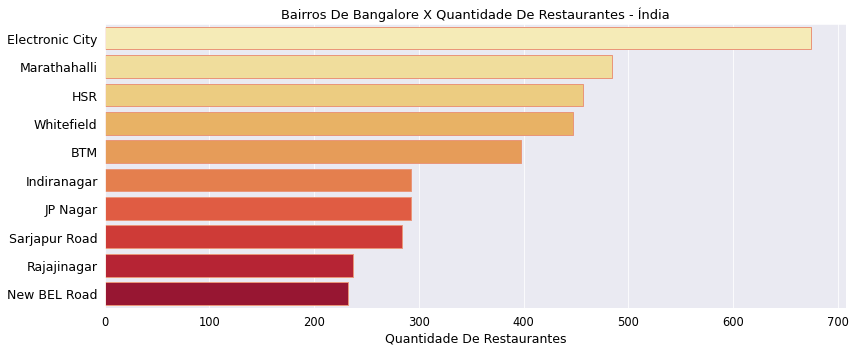

In [ ]:
# Gráfico de coluna para representar o Top 10 dos bairros de Bangalores com mais restaurantes localizáveis:
sns.set_style('darkgrid')
ax = sns.barplot(data = df_restaurantes.groupby('area').agg({'area': 'size'}).rename(
    columns = {'area': 'qtd_restaurantes'}
).sort_values('qtd_restaurantes', ascending = False).reset_index().head(10),
y = 'area', x = 'qtd_restaurantes', palette = 'YlOrRd', edgecolor = 'darksalmon')
ax.figure.set_size_inches(12, 5)
ax.set_ylabel('')
ax.set_xlabel('Quantidade De Restaurantes', fontsize = 12.5, color = 'k')
ax.set_xticklabels(list(range(0, 701, 100)), fontsize = 11.5, color = 'k')
ax.set_yticklabels(['Electronic City', 'Marathahalli',
       'HSR', 'Whitefield', 'BTM',
       'Indiranagar', 'JP Nagar',
       'Sarjapur Road', 'Rajajinagar',
       'New BEL Road'], fontsize = 12.5, color = 'k')
ax.set_title('Bairros De Bangalore X Quantidade De Restaurantes - Índia', fontsize = 13, color = 'k')
plt.tight_layout();

### Os bairros com mais restaurantes concentrados são destacavelmente Electronic City, Marathahalli e HSR, em Electronic City, por exemplo, há mais de 600 restaurantes no bairro, enquanto em Marathahalli e HSR há uma concentração de restaurantes abaixo de 600. 

### (3) Qual é a média de restaurantes por bairro na cidade de Bangalore?

In [ ]:
# A média de restaurantes por bairro na cidade de Bangalore:
df_restaurantes.groupby('area').agg({
    'area': 'size'
}).rename(columns = {
    'area': 'qtd_restaurantes'
}).sort_values('qtd_restaurantes', ascending = False).qtd_restaurantes.mean()

52.798816568047336

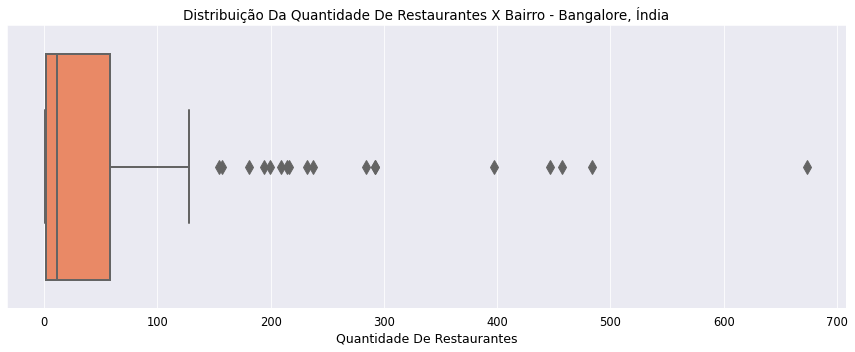

In [ ]:
# Gráfico de caixa para representar a distribuição quantitativa de restaurantes presentes em Bangalore na Índia:
ax = sns.boxplot(data = df_restaurantes.groupby('area').agg({
    'area': 'size'
}).rename(columns = {
    'area': 'qtd_restaurantes'
}).reset_index(), x = 'qtd_restaurantes', orient = 'h', color = 'coral',
fliersize = 10, linewidth = 2)
ax.figure.set_size_inches(12, 5)
ax.set_ylabel('')
ax.set_xlabel('Quantidade De Restaurantes', fontsize = 12.5, color = 'k')
ax.set_xticklabels(['0', '0', '100', '200', '300', '400', '500', '600', '700'], fontsize = 11.5, color = 'k')
ax.set_title('Distribuição Da Quantidade De Restaurantes X Bairro - Bangalore, Índia', fontsize = 13.5, color = 'k')
plt.tight_layout();

### Observacionalmente é constatável que há dados atípicos (outliers), ou seja, há bairros com uma quantidade de restaurantes concentravelmente exagerados.

### O problema de ter outliers em um conjunto de dados é que a média aritmética é informacionalmente distorcida por tais dados atípicos.

### Para evitar tal problema, iremos filtrar os bairros que estão com uma quantidade de restaurantes que não são outliers, e assim iremos obter uma média aritmética que informe corretamente qual é a média de restaurantes por bairro na cidade de Bangalore.

In [ ]:
# Visualização reiterada dos 10 bairros com mais restaurantes localizados em Bangalore na Índia:
df_bairros = df_restaurantes.groupby('area').agg({
    'area': 'size'
}).rename(columns = {'area': 'qtd_restaurantes'}).sort_values('qtd_restaurantes', ascending = False)
print(df_bairros.shape)
df_bairros.head(10)

(169, 1)


,qtd_restaurantes
area,
"Electronic City, Bangalore",674
"Marathahalli, Bangalore",484
"HSR, Bangalore",457
"Whitefield, Bangalore",447
"BTM, Bangalore",397
"Indiranagar, Bangalore",292
"JP Nagar, Bangalore",292
"Sarjapur Road, Bangalore",284
"Rajajinagar, Bangalore",237


In [ ]:
# Cálculo do IQR, limite superior e inferior para podermos filtrar os dados não-outliers:
IQR = df_bairros.qtd_restaurantes.quantile(0.75) - df_bairros.qtd_restaurantes.quantile(0.25)
print('Limite superior: ', df_bairros.qtd_restaurantes.quantile(0.75) + (1.5 * IQR))
print('\n')
print('Limite inferior: ', df_bairros.qtd_restaurantes.quantile(0.25) - (1.5 * IQR))

Limite superior:  142.0


Limite inferior:  -82.0


In [ ]:
# Verificação da quantidade de outliers presentes no conjunto de dados:
# Interpretativamente, há 18 bairros em Bangalore na Índia com uma quantidade de restaurantes demasiada:
print('Quantidade De Outliers: ', df_bairros.query('qtd_restaurantes > 142').shape[0])

Quantidade De Outliers:  18


In [ ]:
# Verificação estatística dos dados não-outliers de tal conjunto de dados:
df_bairros.query('qtd_restaurantes <= 142').describe()

,qtd_restaurantes
count,151.000000
mean,23.860927
std,32.597350
min,1.000000
25%,1.000000
50%,6.000000
75%,37.000000
max,128.000000


In [ ]:
# Verificação estatística dos dados outliers:
df_bairros.query('qtd_restaurantes > 142').describe()

,qtd_restaurantes
count,18.000000
mean,295.555556
std,141.029084
min,154.000000
25%,201.500000
50%,234.500000
75%,370.750000
max,674.000000


### Em média há 23 restaurantes por bairro na cidade de Bangalore, Índia. Anteriormente, à média com os dados outliers presentes distorceram a informação da média aritmética para 53, isto é, como se em média a cidade de Bangalore tivesse aproximamente 53 restaurantes por bairro. 

### (4) Quais são os pratos mais populares nos restaurantes de Bangalore?

In [ ]:
# Quebra da coluna pratos_populares em dataframes com o método split() e expand = True:
# para podermos realizar uma concatenação entre todos os dataframes para formar um dataframe de uma coluna somente
# com todos os pratos populares presentes:
df_pratos_populares = df_restaurantes.pratos_populares.str.split(',', expand = True)[[0]]
df_1_2 = df_restaurantes.pratos_populares.str.split(',', expand = True)[[1]].rename(columns =
                                                                           {1: 0})
df_2_2 = df_restaurantes.pratos_populares.str.split(',', expand = True)[[2]].rename(columns =
                                                                           {2: 0})
df_3_2 = df_restaurantes.pratos_populares.str.split(',', expand = True)[[3]].rename(columns =
                                                                           {3: 0})
df_4_2 = df_restaurantes.pratos_populares.str.split(',', expand = True)[[4]].rename(columns =
                                                                           {4: 0})
df_5_2 = df_restaurantes.pratos_populares.str.split(',', expand = True)[[5]].rename(columns =
                                                                           {5: 0})

In [ ]:
# Concatenação entre todos os dataframes anteriormente criados:
df_pratos_populares = pd.concat([df_pratos_populares, df_1_2, df_2_2,
           df_3_2, df_4_2, df_5_2]).rename(columns = {0 : 'pratos_populares'})
print(df_pratos_populares.shape)
df_pratos_populares.head(10)

(53538, 1)


,pratos_populares
0,Filtered Coffee
1,Authentic Hyderabadi Biryani
2,NaN
3,Barbeque Chicken Pizza
4,Fiery Chicken
5,NaN
6,Crispy Spicy Chicken
7,Mcspicy Chicken
8,Paneer Fry
9,Tamilnadu Style


In [ ]:
# Verificação de que há erro nos dados:
df_pratos_populares.query('pratos_populares == "Cheesecake"')

,pratos_populares
5007,Cheesecake
6084,Cheesecake
6283,Cheesecake


In [ ]:
# Alguns dados estão com espaço branco no início, e isso gera a confusão de que há dois dados diferentes no conjunto de dados:
df_pratos_populares.query('pratos_populares == " Cheesecake"')

,pratos_populares
134,Cheesecake
785,Cheesecake
888,Cheesecake
2941,Cheesecake
3013,Cheesecake
...,...
2971,Cheesecake
3230,Cheesecake
4015,Cheesecake
4681,Cheesecake


In [ ]:
# Eliminação do espaço branco no início dos elementos para facilitar no agrupamento de tais valores únicos
# pelo groupby():
df_pratos_populares.pratos_populares = df_pratos_populares.pratos_populares.str.strip()
df_pratos_populares[df_pratos_populares.pratos_populares.str[0] == ' ']

,pratos_populares


In [ ]:
# Nova verificação para vermos que o erro foi corrigido:
df_pratos_populares.query('pratos_populares == " Cheesecake"')

,pratos_populares


In [ ]:
# Os 20 pratos mais populares nos restaurantes de Bangalore:
df_pratos_populares.groupby('pratos_populares').agg({
    'pratos_populares': 'size'
}).rename(columns = {'pratos_populares': 'qtd_pratos'}).sort_values('qtd_pratos', ascending = False).head(20)

,qtd_pratos
pratos_populares,
Starters,76
Cheesecake,71
Biryani,64
Chicken,45
Vada,45
Desserts,42
Chicken Biryani,41
Rolls,41
Gulab Jamun,39


In [ ]:
# % do quão os 20 pratos são populares na cidade de Bangalore em relação ao todo:
(df_pratos_populares.groupby('pratos_populares').agg({
    'pratos_populares': 'size'
}).rename(columns = {'pratos_populares': 'qtd_pratos'}).sort_values('qtd_pratos', ascending = False).qtd_pratos / df_pratos_populares.groupby('pratos_populares').agg({
    'pratos_populares': 'size'
}).rename(columns = {'pratos_populares': 'qtd_pratos'}).sort_values('qtd_pratos', ascending = False).qtd_pratos.sum() * 100).round(2).to_frame().head(20)

,qtd_pratos
pratos_populares,
Starters,0.92
Cheesecake,0.86
Biryani,0.77
Chicken,0.54
Vada,0.54
Desserts,0.51
Chicken Biryani,0.49
Rolls,0.49
Gulab Jamun,0.47


In [ ]:
# Separação dos 10 pratos mais populares no formato array numpy:
df_pratos_populares.groupby('pratos_populares').agg({
    'pratos_populares': 'size'
}).rename(columns = {'pratos_populares': 'qtd_pratos'}).sort_values('qtd_pratos', ascending = False).reset_index(
    
).pratos_populares[:10].to_numpy()

array(['Starters', 'Cheesecake', 'Biryani', 'Chicken', 'Vada', 'Desserts',
       'Chicken Biryani', 'Rolls', 'Gulab Jamun', 'Rice'], dtype=object)

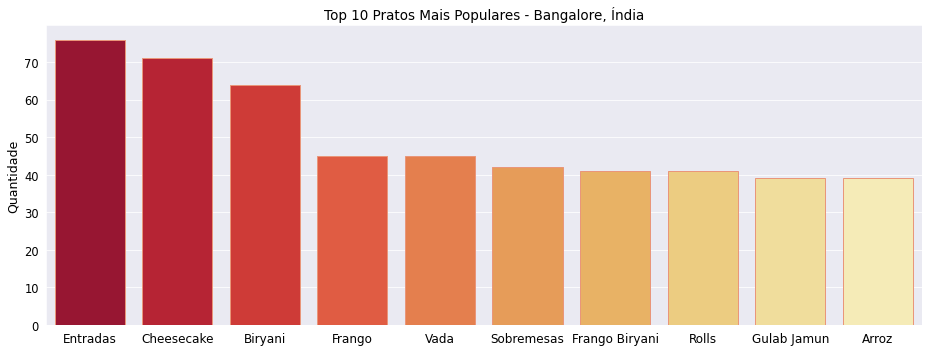

In [ ]:
# Gráfico de colunas para representar visualmente quais são o top 10 de pratos mais populares em Bangalore na Índia:
ax = sns.barplot(data = df_pratos_populares.groupby('pratos_populares').agg({
    'pratos_populares': 'size'
}).rename(columns = {'pratos_populares': 'qtd_pratos'}).sort_values('qtd_pratos', ascending = False).head(10).reset_index(),
x = 'pratos_populares', y = 'qtd_pratos', palette = 'YlOrRd_r', edgecolor = 'darksalmon')
ax.set_xlabel('')
ax.set_ylabel('Quantidade', fontsize = 12.5, color = 'k')
ax.set_yticklabels(list(range(0, 71, 10)), color = 'k', fontsize = 11.5)
ax.set_xticklabels(['Entradas', 'Cheesecake', 'Biryani', 'Frango', 'Vada', 'Sobremesas',
       'Frango Biryani', 'Rolls', 'Gulab Jamun', 'Arroz'], fontsize = 12, color = 'k')
ax.set_title('Top 10 Pratos Mais Populares - Bangalore, Índia', fontsize  = 13.5, color = 'k')
ax.figure.set_size_inches(13, 5)
plt.tight_layout();

### Um dos pratos mais populares nos restaurantes de Bangalore são Cheesecake e Biryani, Cheesecake é um tipo de torta doce de queijo cremoso acrescentado com frutas vermelhas, já Biryani é um tipo de arroz típico da Índia que é altamente popular no país. 

### Vada, Frango Biryani e Gulab Jamun são um dos pratos bem populares na cidade de Bangalore, o Gulab Jamun é um doce típico da região feito à partir de leite em pó, e Vada é um tipo de petisco salgado consumível na Índia.

### (5) Qual é a porcentagem de restaurantes em Bangalore que fornecem ou não fornecem os serviços de entrega, fornecem take away, comida vegana e jantar interno?

In [ ]:
# % de restaurantes que fornecem serviços de entrega:
(df_restaurantes.servico_de_entrega.value_counts(normalize = True) * 100).round(2)

1    99.79
0     0.21
Name: servico_de_entrega, dtype: float64

In [ ]:
# # % de restaurantes que fornecem serviços de take away:
(df_restaurantes.take_away.value_counts(normalize = True) * 100).round(2)

1    66.01
0    33.99
Name: take_away, dtype: float64

In [ ]:
# % de restaurantes que fornecem serviços de jantar interno:
(df_restaurantes.jantar_interno.value_counts(normalize = True) * 100).round(2)

0    55.73
1    44.27
Name: jantar_interno, dtype: float64

In [ ]:
# % de restaurantes que fornecem comida vegana:
(df_restaurantes.comida_vegana.value_counts(normalize = True) * 100).round(2)

0    92.77
1     7.23
Name: comida_vegana, dtype: float64

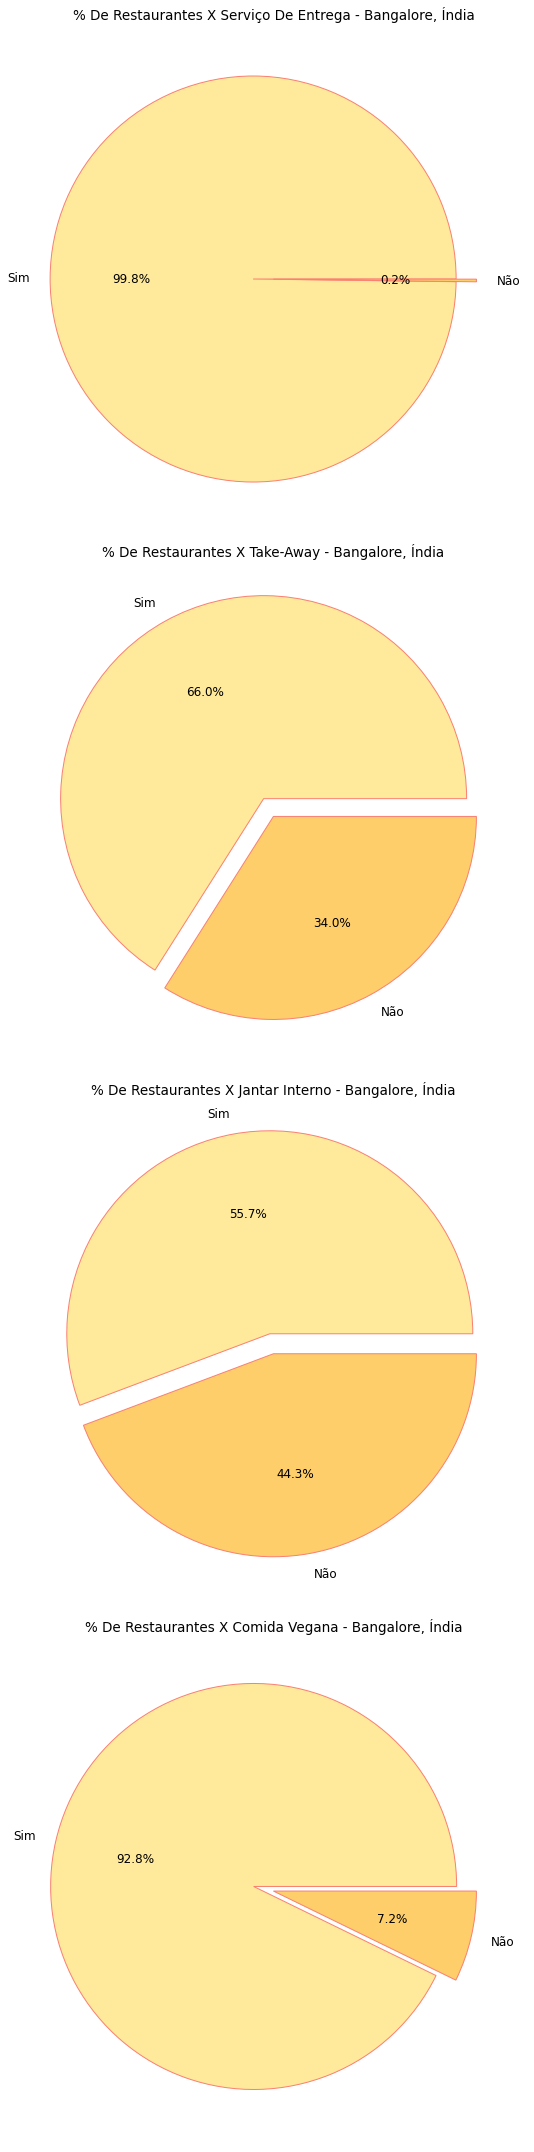

In [ ]:
# Gráficos de pizza para representar visualmente a % de restaurantes em Bangalore que fornecem serviços de entrega
#, fornecem take-away, comida vegana e jantar interno:
cores = sns.color_palette('YlOrRd')
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 30))
ax[0].pie(x = (df_restaurantes.servico_de_entrega.value_counts(normalize = True) * 100).round(2),
        labels = ['Sim', 'Não'], colors = cores, autopct = '%1.1f%%', textprops = {
            'color': 'k', 'fontsize': 12 
        }, wedgeprops = {'edgecolor': 'salmon'}, explode = [0.1, 0.0])
ax[0].set_title('% De Restaurantes X Serviço De Entrega - Bangalore, Índia', fontsize = 13.5, color = 'k')
ax[1].pie(x = (df_restaurantes.take_away.value_counts(normalize = True) * 100).round(2),
        labels = ['Sim', 'Não'], colors = cores, autopct = '%1.1f%%', textprops = {
            'color': 'k', 'fontsize': 12 
        }, wedgeprops = {'edgecolor': 'salmon'}, explode = [0.1, 0.0])
ax[1].set_title('% De Restaurantes X Take-Away - Bangalore, Índia', fontsize = 13.5, color = 'k')
ax[2].pie(x = (df_restaurantes.jantar_interno.value_counts(normalize = True) * 100).round(2),
        labels = ['Sim', 'Não'], colors = cores, autopct = '%1.1f%%', textprops = {
            'color': 'k', 'fontsize': 12 
        }, wedgeprops = {'edgecolor': 'salmon'}, explode = [0.1, 0.0])
ax[2].set_title('% De Restaurantes X Jantar Interno - Bangalore, Índia', fontsize = 13.5, color = 'k')
ax[3].pie(x = (df_restaurantes.comida_vegana.value_counts(normalize = True) * 100).round(2),
        labels = ['Sim', 'Não'], colors = cores, autopct = '%1.1f%%', textprops = {
            'color': 'k', 'fontsize': 12 
        }, wedgeprops = {'edgecolor': 'salmon'}, explode = [0.1, 0.0])
ax[3].set_title('% De Restaurantes X Comida Vegana - Bangalore, Índia', fontsize = 13.5, color = 'k')
plt.tight_layout();

### Percentualmente como era esperado uma altíssima porcentagem de 99.8 % dos restaurantes fornecem serviços de entrega, ou seja, quase todos restaurantes de Bangalore fornecem serviços de delivery ao cliente. 

### O take-away é um serviço fornecido em que o cliente poderá pagar a comida antes de consumi-la e poderá levá-la para come-la em outro local de sua preferência. Uma porcentagem de 66% dos restaurantes em Bangalore fornecem o serviço de take-away, em contraste 34% dos restaurantes não fornecem tal serviço, ou seja, uma razoável parcela de restaurantes em Bangalore o cliente ao pagar, terá que consumir presentemente no local do restaurante.

### Uma altíssima porcentagem de aproximadamente 93% dos restaurantes em Bangalore fornecem aos clientes um cardápio com opções de comidas veganas, enquanto uma pequena parcela de 7% não disponibiliza tal tipo de alimento vegano.

### Por fim, 55% dos restaurantes em Bangalore fornecem a possibilidade de jantar interno, ou seja, tal serviço disponibiliza um ambiente preparatório no restaurante para que o cliente possa jantar no local do restaurante em uma ambietação mais confortável, enquanto 44% dos restaurantes não disponibilizam tal serviço.

### (6) Quais são às avaliações estatisticamente em média aos serviços de entrega e de jantar interno aos restaurantes da cidade de Bangalore?

In [ ]:
# Verificação do tipo de dados da coluna avaliacao_entrega:
df_restaurantes.avaliacao_entrega.unique()

array(['4.1', '4.3', '3.5', '4.4', '4.0', '4.5', '3.8', '3.7', '4.2',
       '4.6', '3.9', '3.4', '3.3', '3.6', '2.9', '3.2', '3.1', '-', '2.7',
       '3.0', '2.8', '4.7', '2.6', '2.5', '2.4'], dtype=object)

In [ ]:
# Verificação do tipo de dados da coluna avaliacao_jantar:
df_restaurantes.avaliacao_jantar.unique()

array(['4.0', '4.3', '3.9', '2.4', '2.8', '-', '4.1', '3.8', '4.2', '3.7',
       '4.8', '3.1', '4.9', '4.4', '2.7', '3.4', '3.6', '2.0', '3.2',
       '2.9', '4.6', '3.5', '3.3', '4.5', '2.3', '3.0', '4.7', '2.5',
       '2.6', '2.2', '2.1'], dtype=object)

In [ ]:
# Conversão de tais colunas do tipo object para o tipo float para podermos analisar corretamente tais avaliações
# dos clientes em relação aos serviços de entrega e de jantar interno dos restaurantes:
df_restaurantes.avaliacao_entrega = df_restaurantes.avaliacao_entrega.str.replace('-', '0').astype(float)
df_restaurantes.avaliacao_jantar = df_restaurantes.avaliacao_jantar.str.replace('-', '0').astype(float)

In [ ]:
# Substituição dos valores que estão com 0 para valores com dados nulos:
df_restaurantes.avaliacao_entrega = df_restaurantes.avaliacao_entrega.replace(0, np.nan)
df_restaurantes.avaliacao_jantar = df_restaurantes.avaliacao_jantar.replace(0, np.nan)

In [ ]:
# Os valores únicos de avaliações dos serviços de entrega de 2.5 até 4.7:
df_restaurantes.avaliacao_entrega.unique()

array([4.1, 4.3, 3.5, 4.4, 4. , 4.5, 3.8, 3.7, 4.2, 4.6, 3.9, 3.4, 3.3,
       3.6, 2.9, 3.2, 3.1, nan, 2.7, 3. , 2.8, 4.7, 2.6, 2.5, 2.4])

In [ ]:
# Os valores únicos de avaliações dos serviços de jantar de 2 até 4.9:
df_restaurantes.avaliacao_jantar.unique()

array([4. , 4.3, 3.9, 2.4, 2.8, nan, 4.1, 3.8, 4.2, 3.7, 4.8, 3.1, 4.9,
       4.4, 2.7, 3.4, 3.6, 2. , 3.2, 2.9, 4.6, 3.5, 3.3, 4.5, 2.3, 3. ,
       4.7, 2.5, 2.6, 2.2, 2.1])

In [ ]:
# Verificação de que tal conversão de tipo de dados foi realizada corretamente:
df_restaurantes[['avaliacao_entrega', 'avaliacao_jantar']].dtypes

avaliacao_entrega    float64
avaliacao_jantar     float64
dtype: object

In [ ]:
# Descrição estatística das avaliações dos serviços de entrega e de jantar interno:
(df_restaurantes[['avaliacao_entrega', 'avaliacao_jantar']].describe()).transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
avaliacao_entrega,7792.0,3.88,0.32,2.4,3.7,3.9,4.1,4.7
avaliacao_jantar,3598.0,3.65,0.47,2.0,3.3,3.7,4.0,4.9


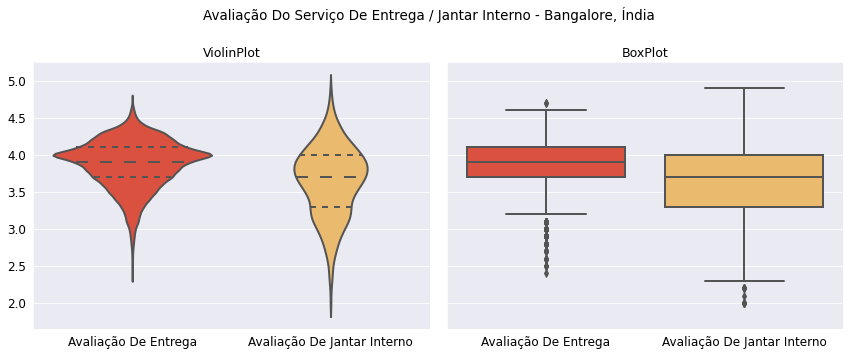

In [ ]:
# Gráfico de violino e de caixa para representar a distribuição quantitativa das avaliações
# dos serviços de entrega e de jantar interno:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), sharey = True)
sns.violinplot(data = df_restaurantes[['avaliacao_entrega', 'avaliacao_jantar']],
                    palette = 'YlOrRd_r', alpha = 0.9, scale = 'count', inner = 'quartile', ax = ax[0],
               linewidth = 2)
ax[0].set_xticklabels(['Avaliação De Entrega', 'Avaliação De Jantar Interno'], fontsize = 12, color = 'k')
ax[0].set_yticklabels(['2.0', '2.0', '2.5', '3.0',
                    '3.5', '4.0', '4.5', '5.0'], fontsize = 12, color = 'k')
ax[0].set_title('ViolinPlot', fontsize = 12.5,
          color = 'k')
sns.boxplot(data = df_restaurantes[['avaliacao_entrega', 'avaliacao_jantar']],
                    palette = 'YlOrRd_r', ax = ax[1], orient = 'v', linewidth = 2)
ax[1].set_xticklabels(['Avaliação De Entrega', 'Avaliação De Jantar Interno'], fontsize = 12, color = 'k')
ax[1].set_title('BoxPlot', fontsize = 12.5,
            color = 'k')
plt.suptitle('Avaliação Do Serviço De Entrega / Jantar Interno - Bangalore, Índia', fontsize = 13.5, color = 'k')
plt.tight_layout(rect = [0, 0, 1, 0.90]);

In [ ]:
# Cálculo de IQR, limite inferior e superior para podermos filtrar os valores não-outliers:
# da coluna de avaliação de entrega:
IQR = (df_restaurantes.avaliacao_entrega.quantile(0.75) - df_restaurantes.avaliacao_entrega.quantile(0.25)).round(2)
print('IQR: ', IQR)
print('\n')
print('Limite superior: ', (df_restaurantes.avaliacao_entrega.quantile(0.75) + (1.5 * IQR)).round(2))
print('\n')
print('Limite inferior: ', (df_restaurantes.avaliacao_entrega.quantile(0.25) - (1.5 * IQR)).round(2))

IQR:  0.4


Limite superior:  4.7


Limite inferior:  3.1


In [ ]:
# Cálculo de IQR, limite inferior e superior para podermos filtrar os valores não-outliers:
# da coluna de avaliação de jantar interno:
IQR = (df_restaurantes.avaliacao_jantar.quantile(0.75) - df_restaurantes.avaliacao_jantar.quantile(0.25)).round(2)
print('IQR: ', IQR)
print('\n')
print('Limite superior: ', (df_restaurantes.avaliacao_jantar.quantile(0.75) + (1.5 * IQR)).round(2))
print('\n')
print('Limite inferior: ', (df_restaurantes.avaliacao_jantar.quantile(0.25) - (1.5 * IQR)).round(2))

IQR:  0.7


Limite superior:  5.05


Limite inferior:  2.25


In [ ]:
# Descrição estatística das avaliações do serviço de entrega não distorcidas informacionalmente por outliers:
(df_restaurantes.query('avaliacao_entrega >= 3.1 | avaliacao_entrega <= 4.7')[['avaliacao_entrega']].describe()).transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
avaliacao_entrega,7792.0,3.88,0.32,2.4,3.7,3.9,4.1,4.7


In [ ]:
# Descrição estatística das avaliações do serviço de jantar interno não distorcidas informacionalmente por outliers:
(df_restaurantes.query('avaliacao_jantar >= 2.25 | avaliacao_jantar <= 5.05')[['avaliacao_jantar']].describe()).transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
avaliacao_jantar,3598.0,3.65,0.47,2.0,3.3,3.7,4.0,4.9


### Em média os restaurantes de Bangalore recebem uma avaliação de serviço de entrega aproximadamente de 3.9 e os serviços de jantar interno apresentam uma avalição de 3.6.

### A pior avaliação do serviço de entrega foi de 2.4 e do serviço de jantar interno foi de 2.0, enquanto em contraste os serviços de entrega e de jantar interno mais bem avaliados receberam uma pontuação de 4.7 e 4.9.

### A avaliação dos serviços de entrega dos restaurantes apresentam uma dispersão de 0.32 pontos em relação à média de 3.9 e a avaliação dos serviços de jantar interno apresentam uma dispersão de 0.47 pontos em relação à média de 3.6. 

### 25% dos restaurantes em Bangalore recebem uma avaliação abaixo de 3.7 e 3.3 pontos aos serviços de entrega e de jantar interno, 50% dos restaurantes recebem uma avaliação abaixo de 3.9 e 3.7, e 75% dos restaurantes recebem uma avaliação abaixo de 4.1 e 4.0 pontos aos serviços de entrega e de jantar interno.

### (7) Quais são os restaurantes que tiveram alta pontuação nas avaliações dos serviços de entrega e de jantar interno? E quais restaurantes destes que mais foram avaliados pelos clientes?

In [ ]:
# Filtragem das avaliações de entrega mais altas, para filtrarmos os restaurantes com serviços
# de entrega altamente qualificados:
avaliacao_entrega = df_restaurantes[df_restaurantes['avaliacao_entrega'].between(3.9, 4.7)]
print(avaliacao_entrega.shape)
avaliacao_entrega.head()

(4690, 19)


,name,url,tipo_de_comida,area,tempo,endereco_completo,numero_tel,servico_de_entrega,take_away,jantar_interno,comida_vegana,avaliacao_jantar,qtd_avaliacoes_jantar,avaliacao_entrega,qtd_avaliacoes_entrega,conhecido_por,pratos_populares,pessoas_conhecem_por,custo_medio
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-park-indiranagar,"South Indian, North Indian, Chinese, Street Food, Biryani, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indiranagar, Defence Colony, Indiranagar, Bangalore",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manchurian","Economical, Prompt Service, Hygiene, Quality Food, Reasonable Price, Quick Service",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods-indiranagar,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar Metro Station, Indiranagar, Bangalore",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, Panner Tikka, Chicken 65, Lemon Chicken, Mutton Biriyani","Boneless Chicken Biryani, Ample Seating Area, Serving Size, Family Place, Relaxed Atmosphere, Delivery Person",700
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza-indiranagar,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Bangalore",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White Sauce Pasta, Pizzas","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, View, Location, Good Taste, Worth the Money",400
5,The Congee Concept,https://www.zomato.com/bangalore/the-congee-concept-ulsoor-bangalore,South Indian,"Ulsoor, Bangalore",NaN,"26, Vemee Sadhana, 1st Main, Ulsoor, Bangalore",+918147222533,1,0,0,0,NaN,0,4.5,239,NaN,NaN,"Fresh Food with Good Quality, Worth the Money, Great Portions, Timely Service, Delicious Food",100


In [ ]:
# Filtragem das avaliações de jantar interno mais altas, para filtrarmos os restaurantes mais bem avaliados
# no fornecimento do serviço de jantar interno aos clientes:
avaliacao_jantar = df_restaurantes[df_restaurantes.avaliacao_jantar.between(3.5, 4.9)]
print(avaliacao_jantar.shape)
avaliacao_jantar.head()

(2465, 19)


,name,url,tipo_de_comida,area,tempo,endereco_completo,numero_tel,servico_de_entrega,take_away,jantar_interno,comida_vegana,avaliacao_jantar,qtd_avaliacoes_jantar,avaliacao_entrega,qtd_avaliacoes_entrega,conhecido_por,pratos_populares,pessoas_conhecem_por,custo_medio
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-park-indiranagar,"South Indian, North Indian, Chinese, Street Food, Biryani, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indiranagar, Defence Colony, Indiranagar, Bangalore",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manchurian","Economical, Prompt Service, Hygiene, Quality Food, Reasonable Price, Quick Service",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods-indiranagar,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar Metro Station, Indiranagar, Bangalore",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, Panner Tikka, Chicken 65, Lemon Chicken, Mutton Biriyani","Boneless Chicken Biryani, Ample Seating Area, Serving Size, Family Place, Relaxed Atmosphere, Delivery Person",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyani-house-indiranagar-bangalore,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Bangalore",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambiance, Good Quantity, Excellent Food, Nice Food",300
6,Burger King,https://www.zomato.com/bangalore/burger-king-indiranagar,"Burger, Fast Food, Beverages, Desserts","Indiranagar, Bangalore",9am – 2am (Today),"545, Next to CMH Metro Station, CMH Road, Indiranagar, Bangalore",+918043028019,1,1,1,0,4.1,1499,4.1,22400,"High-quality, great-tasting and affordable Burgers.","Crispy Spicy Chicken, Chilly Burger, Thick Mango Shake, Strawberry Sundae, Mutton Patty, Whooper Burger","Bang for the Buck, Cozy Ambiance, Nice Crowd, Low Price, Comfortable Seating, Good Atmosphere",400
7,McDonald's,https://www.zomato.com/bangalore/mcdonalds-indiranagar,"Burger, Beverages, Fast Food, Desserts","Indiranagar, Bangalore",9:30am – 1:30am (Today),"539, Ground Floor, Ashwini Complex, Opposite Vijaya Bank, CMH Road, Indiranagar, Bangalore",+918928304094,1,1,1,0,3.8,500,4.1,7508,Their reasonably priced combos,"Mcspicy Chicken, Mcspicy Paneer, Maharaja Mac, Peri Peri Fries, Burgers, Coffee","Casual Seating Area, Hygiene, Location, Friendly Staff, Spicy, Good Place",400


In [ ]:
# Agrupamento dos restaurantes que receberam mais avaliações de entrega:
avaliacao_entrega.groupby(['name','avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {'avaliacao_entrega': 'qtd_avaliacao_entrega'}).reset_index('avaliacao_entrega').sort_values(
    'qtd_avaliacao_entrega', ascending = False
).head(20)

,avaliacao_entrega,qtd_avaliacao_entrega
name,,
Globo Ice Creams of the World,4.0,17
Polar Bear,4.4,11
Kwality Wall’s Frozen Dessert and Ice Cream Shop,4.3,11
NIC - Natural Ice Creams,4.5,10
Chai Point,4.1,10
McDonald's,4.1,10
Smoor,4.3,10
Third Wave Coffee,4.1,9
Kanti Sweets,4.3,9


In [ ]:
# Agrupamento dos restaurantes que receberam alta avaliações no serviço de entrega:
avaliacao_entrega.groupby(['name','avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {'avaliacao_entrega': 'qtd_avaliacao_entrega'}).reset_index('avaliacao_entrega').sort_values(
    'avaliacao_entrega', ascending = False
).head(20)

,avaliacao_entrega,qtd_avaliacao_entrega
name,,
Apsara Ice Creams,4.7,1
Omm Nom Nomm,4.7,1
ibaco,4.6,1
Natural Ice Cream,4.6,9
Arun Icecreams,4.6,1
Apsara Ice Creams,4.6,1
Kwality Wall’s Frozen Dessert and Ice Cream Shop,4.6,5
The Betel Leaf Co - Paan The Healthy Indian Dessert,4.6,2
Elixir-Luxury Pearls Drink,4.6,1


### Os estabelecimentos no topo da lista são os estabelecimentos que receberam às mais altas avaliações no serviço de entrega, tal como Apsara Ice Creams, Omm Nom Nomm e NIC (Natural Ice Cream) que são estabelecimentos comumente relacionados à vendas de sorvete que receberam uma avaliação de 4.7 de pontuação aos serviços de entrega que são feitos sem contato com cliente. 

### Ou seja, os estabelecimentos com melhores serviços de entrega em Bangalore na Índia são aqueles relacionados à venda de sorvete.

In [ ]:
# Agrupamento dos restaurantes que receberam alta avaliações no serviço de jantar interno:
avaliacao_jantar.groupby(['name', 'avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {'avaliacao_jantar': 'qtd_avaliacao_jantar'}).reset_index('avaliacao_jantar').sort_values(
    'avaliacao_jantar', ascending = False
).head(20)

,avaliacao_jantar,qtd_avaliacao_jantar
name,,
Brahmin's Coffee Bar,4.9,1
Windmills Craftworks,4.9,1
Milano Ice Cream,4.9,1
CTR Shri Sagar,4.9,1
Burma Burma,4.9,1
Chianti,4.8,2
Arogya Ahaara,4.8,1
Brik Oven,4.8,1
Bologna,4.8,1


In [ ]:
## Agrupamento dos restaurantes que receberam mais avaliações de serviço de entrega
# com suas devidas pontuações recebidas:
avaliacao_jantar.groupby(['name', 'avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {'avaliacao_jantar': 'qtd_avaliacao_jantar'}).reset_index('avaliacao_jantar').sort_values(
    'qtd_avaliacao_jantar', ascending = False
).head(20)

,avaliacao_jantar,qtd_avaliacao_jantar
name,,
Onesta,4.4,7
Burger King,4.0,5
Third Wave Coffee,4.0,5
Polar Bear,3.9,5
Kanti Sweets,3.8,5
Empire Restaurant,4.1,4
Beijing Bites,3.7,4
Mani's Dum Biryani,4.1,4
Polar Bear,4.0,4


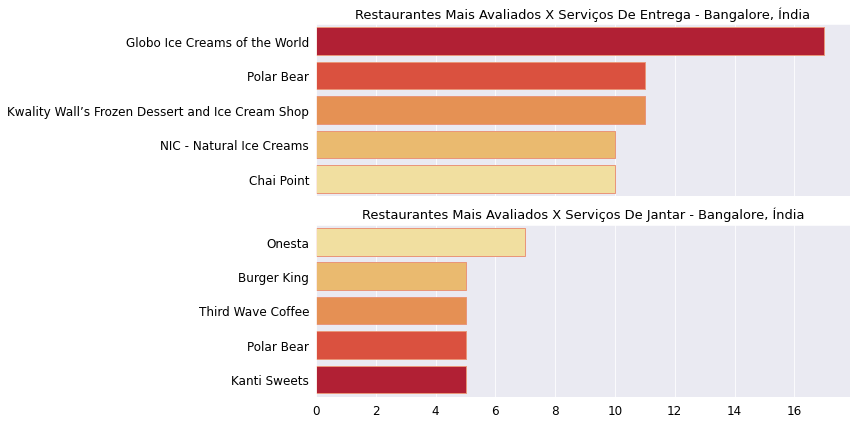

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6), sharex = True)
sns.barplot(data = avaliacao_entrega.groupby(['name','avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {'avaliacao_entrega': 'qtd_avaliacao_entrega'}).reset_index().sort_values(
    'qtd_avaliacao_entrega', ascending = False
).head(5), x = 'qtd_avaliacao_entrega', y = 'name', ax = ax[0], palette = 'YlOrRd_r', 
edgecolor = 'darksalmon')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_yticklabels(avaliacao_entrega.groupby(['name','avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {'avaliacao_entrega': 'qtd_avaliacao_entrega'}).reset_index().sort_values(
    'qtd_avaliacao_entrega', ascending = False
).name[:5], color = 'k', fontsize = 12)
ax[0].set_title('Restaurantes Mais Avaliados X Serviços De Entrega - Bangalore, Índia', fontsize = 13, color = 'k')
sns.barplot(data = avaliacao_jantar.groupby(['name','avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {'avaliacao_jantar': 'qtd_avaliacao_jantar'}).reset_index().sort_values(
    'qtd_avaliacao_jantar', ascending = False
).head(5), x = 'qtd_avaliacao_jantar', y = 'name', ax = ax[1], palette = 'YlOrRd', 
edgecolor = 'darksalmon')
ax[1].set_ylabel('')
ax[1].set_xticklabels(list(range(0, 17, 2)), fontsize = 12, color = 'k')
ax[1].set_xlabel('')
ax[1].set_yticklabels(avaliacao_jantar.groupby(['name','avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {'avaliacao_jantar': 'qtd_avaliacao_jantar'}).reset_index().sort_values(
    'qtd_avaliacao_jantar', ascending = False
).name[:5], color = 'k', fontsize = 12)
ax[1].set_title('Restaurantes Mais Avaliados X Serviços De Jantar - Bangalore, Índia', fontsize = 13, color = 'k')
plt.tight_layout();

### O Globo Ice Cream of the World e o Polar Bear foi um dos estabelecimentos que mais receberam avaliações aos serviços de entrega, e coincidentemente os estabelecimentos que mais receberam avaliações de serviços de entrega foram estabelecimentos relacionados à venda de sorvetes. 

### Enquanto, Onesta e Burger-King foram um dos mais avaliados quantitativamente em relação ao serviço de jantar interno pelos clientes.

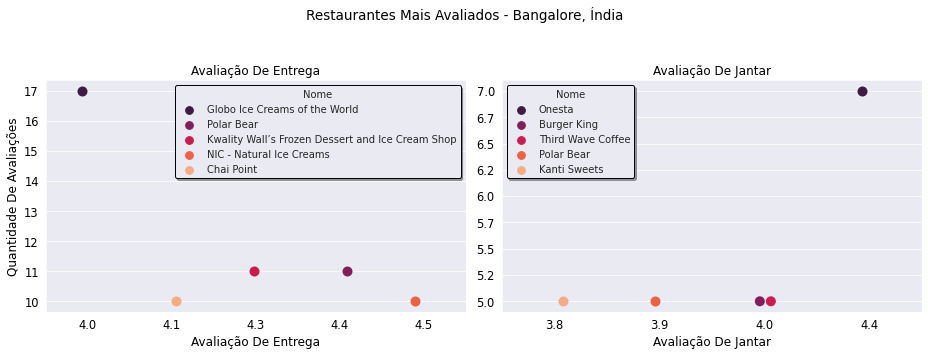

In [ ]:
# Gráfico para representar a avaliação recebida por esses restaurantes e estabelecimentos que 
# mais receberam avaliações do serviço de entrega e de jantar interno:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.stripplot(data = avaliacao_entrega.groupby(['name', 'avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {
   'avaliacao_entrega': 'qtd_avaliacao_entrega' 
}).reset_index().sort_values('qtd_avaliacao_entrega', ascending = False).head(5), x = 'avaliacao_entrega',
y = 'qtd_avaliacao_entrega', hue = 'name', ax = ax[0], size = 10, palette = 'rocket', edgecolor = 'darksalmon')
ax[0].set_xlabel('Avaliação De Entrega', fontsize = 12, color = 'k')
ax[0].set_ylabel('Quantidade De Avaliações', fontsize = 12, color = 'k')
ax[0].set_xticklabels([4.0, 4.1, 4.3, 4.4, 4.5], color = 'k', fontsize = 11.5)
ax[0].set_yticklabels([10, 10, 11, 12, 13, 14, 15, 16, 17], color = 'k', fontsize = 11.5)
ax[0].legend(title = 'Nome', fontsize = 'medium', edgecolor = 'k', shadow = True)
sns.stripplot(data = avaliacao_jantar.groupby(['name', 'avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {
   'avaliacao_jantar': 'qtd_avaliacao_jantar' 
}).reset_index().sort_values('qtd_avaliacao_jantar', ascending = False).head(5), x = 'avaliacao_jantar',
y = 'qtd_avaliacao_jantar', hue = 'name', ax = ax[1], size = 10, palette = 'rocket', edgecolor = 'darksalmon')
ax[1].set_xlabel('Avaliação De Jantar', fontsize = 12, color = 'k')
ax[1].set_ylabel('')
ax[1].set_xticklabels([3.8, 3.9, 4.0, 4.4], color = 'k', fontsize = 11.5)
ax[1].set_yticklabels([5.0, 5.0, 5.2, 5.5, 5.7, 6.0, 6.2, 6.5, 6.7, 7.0], color = 'k', fontsize = 11.5)
ax[1].legend(title = 'Nome', fontsize = 'medium', edgecolor = 'k', shadow = True)
plt.suptitle('Restaurantes Mais Avaliados - Bangalore, Índia', fontsize = 13.5, color = 'k')
ax[0].set_title('Avaliação De Entrega', fontsize = 12, color = 'k')
ax[1].set_title('Avaliação De Jantar', fontsize = 12, color = 'k')
plt.tight_layout(rect = [0, 0, 1, 0.85]);

### Os restaurantes que mais receberam avaliações do serviço de entrega tiveram uma avaliação de alta qualidade em uma classificação de 4 até 4.5 de pontuação avaliativa, NIC (Natural Ice Creams) e Polar foram um desses estabelecimentos que receberam mais feedbacks (avaliações) e tiveram boas avaliações de 4.4 e 4.5.

### Em contraste, os restaurantes que receberam mais avaliações do serviço de jantar interno tiveram uma avaliação em torno de 3.8 até 4.4, que consideravelmente é uma avaliação acima da média em que os restaurantes mais bem avaliados são Onesta e Burger King com uma pontuação de 4.0 e 4.4.

In [ ]:
# Os restaurantes mais bem avaliados no serviço de entrega:
avaliacao_entrega.groupby(['name','avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {'avaliacao_entrega': 'qtd_avaliacao_entrega'}).reset_index().sort_values(
    ['avaliacao_entrega', 'qtd_avaliacao_entrega'], ascending = False
).head(6)

,name,avaliacao_entrega,qtd_avaliacao_entrega
201,Apsara Ice Creams,4.7,1
2185,Omm Nom Nomm,4.7,1
2072,Natural Ice Cream,4.6,9
1668,Kwality Wall’s Frozen Dessert and Ice Cream Shop,4.6,5
475,Bombay Kulfis,4.6,2
3008,The Betel Leaf Co - Paan The Healthy Indian Dessert,4.6,2


In [ ]:
# Os restaurantes mais bem avaliados no serviço de jantar interno:
avaliacao_jantar.groupby(['name', 'avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {'avaliacao_jantar': 'qtd_avaliacao_jantar'}).reset_index('avaliacao_jantar').sort_values(
    ['avaliacao_jantar', 'qtd_avaliacao_jantar'], ascending = False
).head(7)

,avaliacao_jantar,qtd_avaliacao_jantar
name,,
Brahmin's Coffee Bar,4.9,1
Burma Burma,4.9,1
CTR Shri Sagar,4.9,1
Milano Ice Cream,4.9,1
Windmills Craftworks,4.9,1
Chianti,4.8,2
Natural Ice Cream,4.8,2


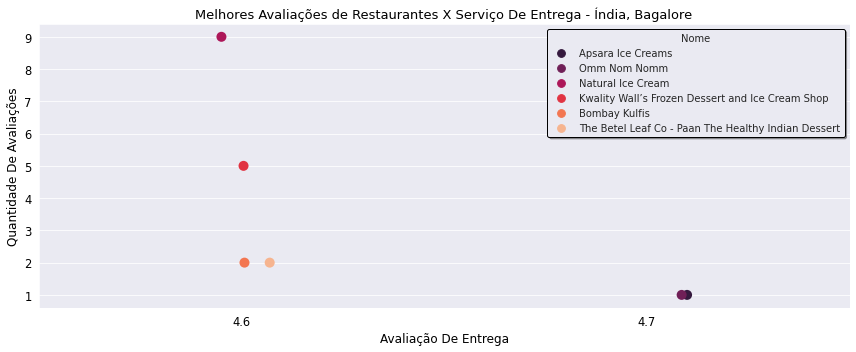

In [ ]:
# Restaurantes com a melhor pontuação avaliativa no serviço de entrega:
ax = sns.stripplot(data = avaliacao_entrega.groupby(['name','avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {'avaliacao_entrega': 'qtd_avaliacao_entrega'}).reset_index().sort_values(
    ['avaliacao_entrega', 'qtd_avaliacao_entrega'], ascending = False
).head(6), x = 'avaliacao_entrega', y = 'qtd_avaliacao_entrega', hue = 'name',
palette = 'rocket', edgecolor = 'salmon', size = 10)
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Avaliação De Entrega', fontsize = 12, color = 'k')
ax.set_xticklabels([4.6, 4.7], color = 'k', fontsize = 11.5)
ax.set_ylabel('Quantidade De Avaliações', fontsize = 12, color = 'k')
ax.set_yticklabels([1, 1, 2, 3, 4, 5, 6, 7, 8, 9], color = 'k', fontsize = 11.5)
plt.legend(title = 'Nome', fontsize = 'medium', edgecolor = 'k', shadow = True)
ax.set_title('Melhores Avaliações de Restaurantes X Serviço De Entrega - Índia, Bagalore', fontsize = 13, color = 'k')
plt.tight_layout();

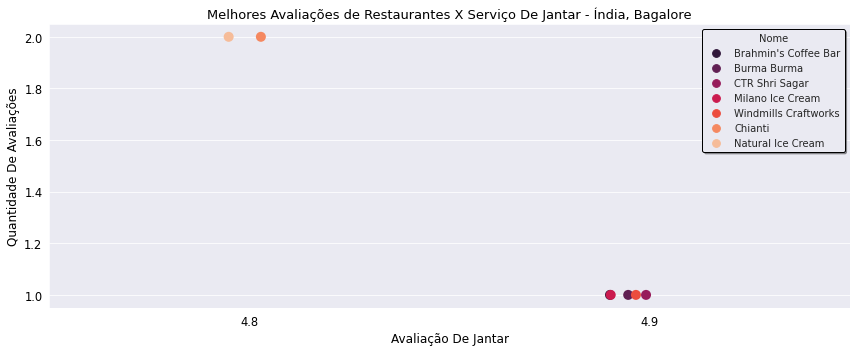

In [ ]:
# Restaurantes com a melhor pontuação avaliativa no serviço de jantar:
ax = sns.stripplot(data = avaliacao_entrega.groupby(['name','avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {'avaliacao_jantar': 'qtd_avaliacao_jantar'}).reset_index().sort_values(
    ['avaliacao_jantar', 'qtd_avaliacao_jantar'], ascending = False
).head(7), x = 'avaliacao_jantar', y = 'qtd_avaliacao_jantar', hue = 'name',
palette = 'rocket', edgecolor = 'salmon', size = 10)
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Avaliação De Jantar', fontsize = 12, color = 'k')
ax.set_xticklabels([4.8, 4.9], color = 'k', fontsize = 11.5)
ax.set_ylabel('Quantidade De Avaliações', fontsize = 12, color = 'k')
ax.set_yticklabels([1.0, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0], color = 'k', fontsize = 11.5)
plt.legend(title = 'Nome', fontsize = 'medium', edgecolor = 'k', shadow = True)
ax.set_title('Melhores Avaliações de Restaurantes X Serviço De Jantar - Índia, Bagalore', fontsize = 13, color = 'k')
plt.tight_layout();

### Os estabelecimentos relacionados à venda de sorvete são um dos estabelecimentos mais bem pontuados nas avaliações dos serviços de entrega, tais estabelecimento recebem uma pontuação em torno de 4.6 até 4.7.

### Os restaurantes mais bem avaliados em pontuação no serviço de jantar interno tiveram uma avaliação em derredor de 4.8 e 4.9, tais restaurantes que receberam tal avaliação máxima foram Brahmin's Coffee Bar, Burma Burma, CTR Shri Sagar. 

### O restaurante Brahmin's Coffee Bar serve idli, vada e outros petiscos indiano no café da manhã, idli é uma típica comida da região, que é um bolo de arroz salgado consumível popularmente nos cafés da manhã na Índia.

### CTR Shri Sagar semelhantemente ao Brahmin's Coffee Bar é um restaurante que fornece acompanhamento com café, e serve atipicamente pratos como bajji, que é um bolinho originário da Índia que é feito à partir de vegetais quentes picantes, e geralmente cebola, com determinadas variantes.

### (8) Os restaurantes mais bem avaliados pontuadamente nos serviços de entrega e de jantar interno são conhecidor por quais qualificações profissionais em Bangalore na Índia?

In [ ]:
# Lista dos restaurantes mais bem avaliados no serviço de entrega:
avaliacao_entrega.groupby(['name','avaliacao_entrega']).agg({
    'avaliacao_entrega': 'size'
}).rename(columns = {'avaliacao_entrega': 'qtd_avaliacao_entrega'}).reset_index().sort_values(
    ['avaliacao_entrega', 'qtd_avaliacao_entrega'], ascending = False
).name[:6].to_list()

['Apsara Ice Creams',
 'Omm Nom Nomm',
 'Natural Ice Cream',
 'Kwality Wall’s Frozen Dessert and Ice Cream Shop',
 'Bombay Kulfis',
 'The Betel Leaf Co - Paan The Healthy Indian Dessert']

In [ ]:
# Lista dos restaurantes mais bem avaliados no serviço de jantar interno:
avaliacao_jantar.groupby(['name','avaliacao_jantar']).agg({
    'avaliacao_jantar': 'size'
}).rename(columns = {'avaliacao_jantar': 'qtd_avaliacao_jantar'}).reset_index().sort_values(
    ['avaliacao_jantar', 'qtd_avaliacao_jantar'], ascending = False
).name[:7].to_list()

["Brahmin's Coffee Bar",
 'Burma Burma',
 'CTR Shri Sagar',
 'Milano Ice Cream',
 'Windmills Craftworks',
 'Chianti',
 'Natural Ice Cream']

In [ ]:
# Lista dos restaurantes mais bem avaliados no serviço de entrega ou de jantar interno:
lista_x = ['Apsara Ice Creams',
 'Omm Nom Nomm',
 'Natural Ice Cream',
 'Kwality Wall’s Frozen Dessert and Ice Cream Shop',
 'Bombay Kulfis',
 'The Betel Leaf Co - Paan The Healthy Indian Dessert', "Brahmin's Coffee Bar",
 'Burma Burma',
 'CTR Shri Sagar',
 'Milano Ice Cream',
 'Windmills Craftworks',
 'Chianti',
 'Natural Ice Cream']
lista_x

['Apsara Ice Creams',
 'Omm Nom Nomm',
 'Natural Ice Cream',
 'Kwality Wall’s Frozen Dessert and Ice Cream Shop',
 'Bombay Kulfis',
 'The Betel Leaf Co - Paan The Healthy Indian Dessert',
 "Brahmin's Coffee Bar",
 'Burma Burma',
 'CTR Shri Sagar',
 'Milano Ice Cream',
 'Windmills Craftworks',
 'Chianti',
 'Natural Ice Cream']

In [ ]:
# Agrupamento dos restaurantes que são conhecidos popularmente pelos clientes por alguma qualidade profissional recomendável:
df_conhecido_por = df_restaurantes.groupby(['name', 'conhecido_por']).agg({
    'conhecido_por': 'size'
}).rename(columns = {
    'conhecido_por': 'qtd'
}).reset_index().sort_values('qtd', ascending = False)
print(df_conhecido_por.shape)
df_conhecido_por.head(10)

(167, 3)


,name,conhecido_por,qtd
114,Pizza Hut,Pan Pizzas,17
98,Meghana Foods,Spicy Chicken Biryani,12
166,ibaco,natural flavored ice creams,7
21,Burger King,"High-quality, great-tasting and affordable Burgers.",6
44,EatFit,healthy and wholesome meals,5
105,Nagarjuna,Andhra meals and Biryanis,5
90,Mainland China,authentic Chinese delicacies,4
63,Ibaco,natural flavored ice creams,4
111,Onesta,"serving a combo of unlimited pizzas, desserts and a beverage",4
146,Thalassery Restaurant,One of a kind Kerala Cuisine,4


In [ ]:
# Alguns restaurantes mais bem avaliados no serviço de jantar interno ou de entrega 
# são conhecidos popularmente por:
df_conhecido_por[df_conhecido_por.name.isin(lista_x)]

,name,conhecido_por,qtd
101,Milano Ice Cream,Varieties of Gelato Ice Creams.,3
30,Chianti,wide variety of wine and authentic Italian Cuisine,2
162,Windmills Craftworks,Ambience And Live Performances in Jazz Theatre,1
23,CTR Shri Sagar,being one of the oldest South Indian breakfast place in Bangalore,1


### Os restaurantes mais bem avaliados no serviço de jantar interno, tal como Milano Ice Cream, Chianti, Windmills Craftworks	e CTR Shri Sagar são conhecidos por várias qualidades comerciais:

### Milano Ice Cream que oferece um bom serviço de jantar interno no local é conhecido por ter uma variedade ampla de sorvetes.

### Chianti é um restaurante conhecido por ter uma vasta variedade de vinhos e por ter uma autêntica cozinha italiana.

### Windmills Craftworks é conhecido popularmente por ter um ambiente de perfomances de Jazz ao vivo.

### Por fim, CTR Shri Sagar	é conhecido por ser um dos restaurantes mais antigos que fornecem um café da manhã sul-indiano em Bangalore na Índia.



### A tendência é que restaurantes com um ambiente agradavelmente confortável sejam restaurantes com uma boa avaliação de serviço de jantar interno.

### (9) Os restaurantes em geral de Bangalore são conhecidos adjetivamente por quais características pelos clientes?

In [ ]:
# Agrupamento da quantidade da quantidade de avaliações de serviços de jantar e serviço de entrega
# recebido por cada restaurantes em Bangalore, Índia:
df_qtd_avaliacoes_2 = df_restaurantes.groupby('name').agg({'qtd_avaliacoes_jantar': 'sum',
                                     'qtd_avaliacoes_entrega': 'sum'}).sort_values(['qtd_avaliacoes_jantar', 'qtd_avaliacoes_entrega']
, ascending = False)
print(df_qtd_avaliacoes_2.shape)
df_qtd_avaliacoes_2.head(10)

(5242, 2)


,qtd_avaliacoes_jantar,qtd_avaliacoes_entrega
name,,
Onesta,45201,96662
Byg Brewski Brewing Company,40200,20122
Barbeque Nation,39260,12320
AB's - Absolute Barbecues,36193,3268
Empire Restaurant,25848,196634
Biergarten,23242,1413
Meghana Foods,18745,305496
Chulha Chauki Da Dhaba,15029,23030
House Of Commons,14202,516


In [ ]:
# Informação estatística generalizada sobre a quantidade de avaliações recebidas
# por cada restaurante em relação ao serviço de entrega e ao serviço de jantar interno:
df_qtd_avaliacoes_2[['qtd_avaliacoes_jantar', 'qtd_avaliacoes_entrega']].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
qtd_avaliacoes_jantar,5242.0,267.43,1542.29,0.0,0.0,1.0,73.0,45201.0
qtd_avaliacoes_entrega,5242.0,3429.46,16341.54,0.0,36.0,225.0,1570.0,634531.0


In [ ]:
# Verificação para vermos se há algum erro à ser corrigido em relação aos nomes dos restaurantes:
(df_conhecido_por.name.str[0] == ' ').sum()

0

In [ ]:
# Quebra dos elementos da coluna pessoas_conhecem_por para atribuirmos à um dataframe somente:
df_0_3 = df_restaurantes.pessoas_conhecem_por.str.split(',', expand = True)[[0]]
df_1_3 = df_restaurantes.pessoas_conhecem_por.str.split(',', expand = True)[[1]].rename(columns = {
    1:0
})
df_2_3 = df_restaurantes.pessoas_conhecem_por.str.split(',', expand = True)[[2]].rename(columns = {
    2:0
})
df_3_3 = df_restaurantes.pessoas_conhecem_por.str.split(',', expand = True)[[3]].rename(columns = {
    3:0
})
df_4_3 = df_restaurantes.pessoas_conhecem_por.str.split(',', expand = True)[[4]].rename(columns = {
    4:0
})
df_5_3 = df_restaurantes.pessoas_conhecem_por.str.split(',', expand = True)[[5]].rename(columns = {
    5:0
})

In [ ]:
# Concatenação de todos os dataframes para sabermos como os clientes avaliam os restaurantes de Bengalore, Índia:
df_avaliacao_clientes = pd.concat([df_0_3, df_1_3, df_2_3, df_3_3, df_4_3, df_5_3]).rename(columns = {
    0:'avaliacao_clientes'
})
print(df_avaliacao_clientes.shape)
df_avaliacao_clientes.head(10)

(53538, 1)


,avaliacao_clientes
0,Economical
1,Boneless Chicken Biryani
2,Great Recommendations
3,Value for Money
4,Elegantly Decorated
5,Fresh Food with Good Quality
6,Bang for the Buck
7,Casual Seating Area
8,Serving Size
9,Good Packaging


In [ ]:
# Verifição de se há erro à ser corrigido em tal dataframe:
(df_avaliacao_clientes.avaliacao_clientes.str[0] == ' ').sum()

16301

In [ ]:
# Diferença entre a quantidade de avaliações dos clientes e a quantidade de elementos que estão com um espaço branco no início:
df_avaliacao_clientes.shape[0] - (df_avaliacao_clientes.avaliacao_clientes.str[0] == ' ').sum()

37237

In [ ]:
# Quantidade de dados ausentes no conjunto de dados como um todo:
# Relativo aos restaurantes que não receberam avaliações:
df_avaliacao_clientes.isnull().sum()

avaliacao_clientes    33753
dtype: int64

In [ ]:
# Quantidade de linhas no conjunto de dados como um todo:
df_avaliacao_clientes.shape[0]

53538

In [ ]:
# Correção do erro para retirar o espaço branco no início de tais dados:
df_avaliacao_clientes.avaliacao_clientes = df_avaliacao_clientes.avaliacao_clientes.str.strip()
(df_avaliacao_clientes.avaliacao_clientes.str[0] == ' ').sum()

0

In [ ]:
# Agrupamento da quantidade de avaliações que os restaurantes de Bangalore mais recebem dos clientes:
df_avaliacao_clientes = df_avaliacao_clientes.groupby('avaliacao_clientes').agg(
    {'avaliacao_clientes': 'size'}
).rename(columns = {
    'avaliacao_clientes': 'qtd_avaliacoes'
}).reset_index().sort_values('qtd_avaliacoes', ascending = False)
print(df_avaliacao_clientes.shape)
df_avaliacao_clientes.head(10)

(968, 2)


,avaliacao_clientes,qtd_avaliacoes
962,Worth the Money,621
477,Great Portions,513
900,Timely Service,423
422,Good Quality,408
355,Fresh Food,380
300,Extensive Menu,311
92,Best Food under Best Budget,293
264,Elaborate Menu,293
719,Price,290
188,Contactless Delivery,289


In [ ]:
# % das avaliações mais recebidas pelos restaurantes em Bangalore, Índia:
(df_avaliacao_clientes.set_index('avaliacao_clientes').qtd_avaliacoes / df_avaliacao_clientes.qtd_avaliacoes.sum() * 100).round(2)[:10]

avaliacao_clientes
Worth the Money                3.14
Great Portions                 2.59
Timely Service                 2.14
Good Quality                   2.06
Fresh Food                     1.92
Extensive Menu                 1.57
Best Food under Best Budget    1.48
Elaborate Menu                 1.48
Price                          1.47
Contactless Delivery           1.46
Name: qtd_avaliacoes, dtype: float64

In [ ]:
# Seleção das 10 avaliações majoritárias dos clientes em relação aos restaurantes de Bangalore, Índia:
df_avaliacao_clientes.avaliacao_clientes[:10].to_list()

['Worth the Money',
 'Great Portions',
 'Timely Service',
 'Good Quality',
 'Fresh Food',
 'Extensive Menu',
 'Best Food under Best Budget',
 'Elaborate Menu',
 'Price',
 'Contactless Delivery']

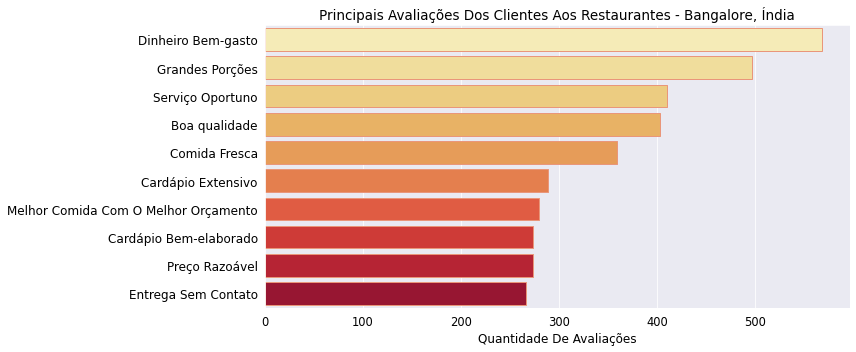

In [ ]:
# Top 10 de avaliações mais comuns dos clientes aos restaurantes de Bangalore:
ax = sns.barplot(data = pd.concat([df_0_3, df_1_3, df_2_3, df_3_3, df_4_3, df_5_3]).rename(columns = {
    0:'avaliacao_clientes'
}).groupby('avaliacao_clientes').agg(
    {'avaliacao_clientes': 'size'}
).rename(columns = {'avaliacao_clientes': 'qtd_avaliacoes'}).sort_values('qtd_avaliacoes', ascending = False).reset_index().head(10),
x = 'qtd_avaliacoes', y = 'avaliacao_clientes', palette = 'YlOrRd', 
edgecolor = 'darksalmon')
ax.figure.set_size_inches(12, 5)
ax.set_ylabel('')
ax.set_xlabel('Quantidade De Avaliações', fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 501, 100)), color = 'k', fontsize = 11.5)
ax.set_yticklabels(['Dinheiro Bem-gasto',
 'Grandes Porções', 'Serviço Oportuno','Boa qualidade', 'Comida Fresca', 'Cardápio Extensivo', 'Melhor Comida Com O Melhor Orçamento',
 'Cardápio Bem-elaborado', 'Preço Razoável', 'Entrega Sem Contato'], fontsize = 12, color = 'k')
ax.set_title('Principais Avaliações Dos Clientes Aos Restaurantes - Bangalore, Índia', fontsize = 13.5, color = 'k')
plt.tight_layout();

### Os restaurantes de Bangalore são conhecidos por venderem comidas em uma porção satisfatória, por terem comida fresca e de boa qualidade, e principalmente por terem um cardápio extensivo com várias opções de aperitivos. 

### Os restaurantes são conhecidos também por oferecerem um serviço de entrega sem-contato entre o entregador e o cliente, e por terem uma comida vendida por um preço razoável aos clientes.

### (10) Quais são os restaurantes mais populares em Bangalore, Índia?

In [ ]:
# Seleção dos 10 restaurantes mais populares em Bangalore no aspecto quantitativo:
df_restaurantes.groupby('name').agg(
    {'name': 'size'}
).rename(columns = {
    'name': 'qtd'
}).reset_index().sort_values('qtd', ascending = False).name[:10].to_list()

['Five Star Chicken',
 'Snack House',
 'Kwality Wall’s Frozen Dessert and Ice Cream Shop',
 'Momo Monk',
 'Lassi Shop',
 'Pizza Hut',
 'Kanti Sweets',
 'Chai Point',
 "McDonald's",
 'Subway']

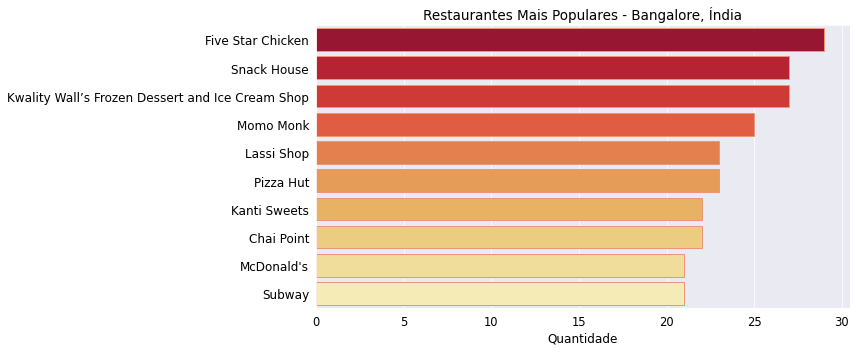

In [ ]:
# Top 10 dos restaurantes mais populares em Bangalore, Índia:
ax = sns.barplot(data = df_restaurantes.groupby('name').agg(
    {'name': 'size'}
).rename(columns = {
    'name': 'qtd'
}).reset_index().sort_values('qtd', ascending = False).head(10), y = 'name', x = 'qtd', palette = 'YlOrRd_r', 
edgecolor = 'darksalmon')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Quantidade', fontsize = 12, color = 'k')
ax.set_ylabel('')
ax.set_yticklabels(['Five Star Chicken',
 'Snack House',
 'Kwality Wall’s Frozen Dessert and Ice Cream Shop',
 'Momo Monk',
 'Lassi Shop',
 'Pizza Hut',
 'Kanti Sweets',
 'Chai Point',
 "McDonald's",
 'Subway'], fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 31, 5,)), color = 'k', fontsize = 11.5)
ax.set_title('Restaurantes Mais Populares - Bangalore, Índia', fontsize = 13.5, color = 'k')
plt.tight_layout();

### Restaurantes como Five Star Chicken, Snack House e McDonald's e Subway (essas últimas como às mais populares mundialmente) são um dos restaurantes mais populares em Bangalore, isto é, são os restaurantes com maior presença quantitativa nos bairros de Bangalore.

### Qual é o custo médio dos restaurantes de Bangalore? E quais são os restaurantes mais caros e mais baratos da cidade com base no custo médio?

In [ ]:
# Informação estatística generalizada do custo médio dos restaurantes de Bangalore:
df_restaurantes[['custo_medio']].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
custo_medio,8923.0,340.23,308.34,50.0,150.0,250.0,400.0,4200.0


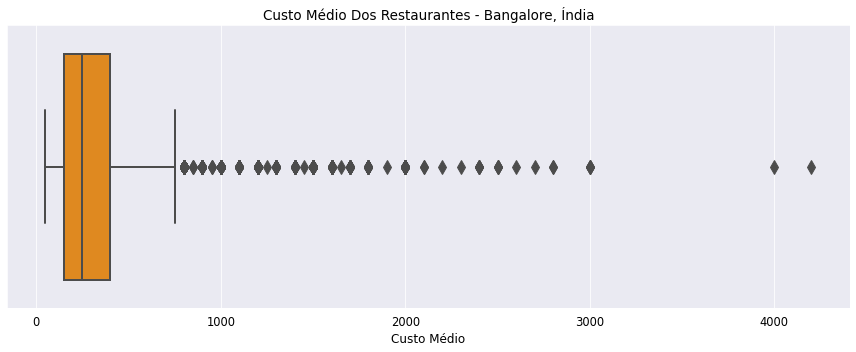

In [ ]:
# Gráfico boxplot para representar a distribuição do custo médio dos restaurantes em Bangalore:
ax = sns.boxplot(data = df_restaurantes, x = 'custo_medio', color = 'darkorange', fliersize = 10, linewidth = 2)
ax.set_xlabel('Custo Médio', fontsize = 12, color = 'k')
ax.set_xticklabels([0, 0, 1000, 2000, 3000, 4000], color = 'k', fontsize = 11.5)
ax.set_title('Custo Médio Dos Restaurantes - Bangalore, Índia', fontsize = 13.5, color = 'k')
ax.figure.set_size_inches(12, 5)
plt.tight_layout();

In [ ]:
# Cálculo para filtrarmos os valores atípicos(outliers) e típicos(não-outliers):
IQR = df_restaurantes.custo_medio.quantile(0.75) - df_restaurantes.custo_medio.quantile(0.25)
print('Limite inferior: ', df_restaurantes.custo_medio.quantile(0.25) - (1.5 * IQR))
print('\n')
print('Limite superior: ', df_restaurantes.custo_medio.quantile(0.75) + (1.5 * IQR))

Limite inferior:  -225.0


Limite superior:  775.0


In [ ]:
# Filtragem da quantidade de restaurantes com um custo médio atípico e demasiado em comparação ao custo padrão 
# dos demais restaurantes de Bangalore:
df_restaurantes.query('custo_medio > 775.0')[['custo_medio']].shape

(724, 1)

In [ ]:
# Informação estatística não-distorcida dos dados não-outliers atinente ao custo médio dos restaurantes:
df_restaurantes.query('custo_medio <= 775.0')[['custo_medio']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
custo_medio,8199.0,268.188804,145.673978,50.0,150.0,250.0,350.0,750.0


In [ ]:
# Agrupamento do custo médio de cada restaurante em ordem decrescente dos mais caros aos mais baratos:
df_restaurantes.groupby('name').agg({'custo_medio': 'sum'}).sort_values('custo_medio', ascending = False).head(10)

,custo_medio
name,
Barbeque Nation,18000
Beijing Bites,13300
Toscano,12450
Starbucks Coffee,11400
Cafe Coffee Day,10950
A2B - Adyar Ananda Bhavan,10800
Chianti,10000
Mainland China,9200
Pizza Hut,9200


In [ ]:
# Restaurantes mais baratos de Bangalore com base no custo médio:
df_restaurantes.groupby('name').agg({'custo_medio': 'sum'}).sort_values('custo_medio', ascending = True).head(10)

,custo_medio
name,
Rapture Roti Curry,50
Hasanambha Iyengars Pastries Palace,50
South Indian Upahara,50
Big Mishra Peda,50
Kiruba Homely Foods,50
Sree Ganesha Fruits & Juice,50
Sri Durga Chats & Ice Cream Parlor,50
Bikaner Sweet Centre,50
Sri Durga Chats And Juice Center,50


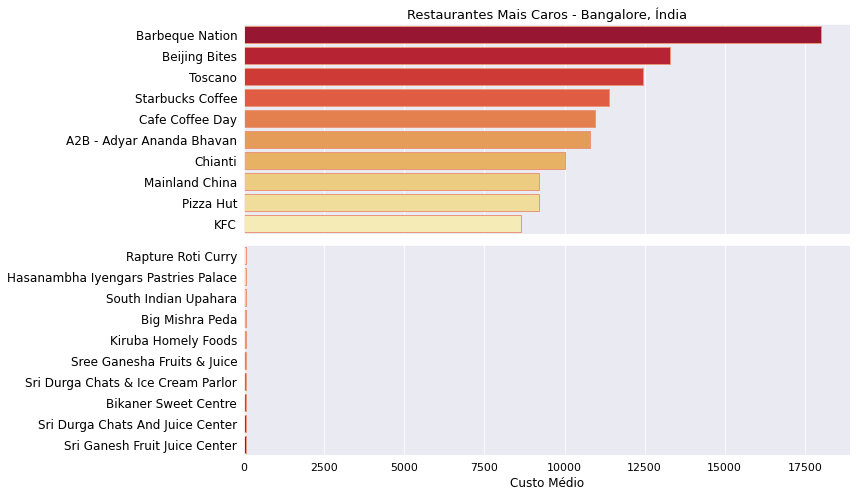

In [ ]:
# Gráfico de barra para representar os restaurantes mais caros e mais baratos em Bangalore:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 7), sharex = True)
sns.barplot(data = df_restaurantes.groupby('name').agg({'custo_medio': 'sum'}).sort_values(
    'custo_medio', ascending = False).reset_index().head(10),
    x = 'custo_medio', y = 'name', ax = ax[0], palette = 'YlOrRd_r', edgecolor = 'darksalmon')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xticklabels([0, 2500, 5000, 7500, 10000, 12500, 15000, 17500], color = 'k', fontsize = 11)
ax[0].set_yticklabels(df_restaurantes.groupby('name').agg({'custo_medio': 'sum'}
                                                          ).sort_values('custo_medio', ascending = False
                                              ).reset_index().name[:10], color = 'k', fontsize = 12)
ax[0].set_title('Restaurantes Mais Caros - Bangalore, Índia', fontsize = 13, color = 'k')
sns.barplot(data = df_restaurantes.groupby('name').agg({'custo_medio': 'sum'}).sort_values(
    'custo_medio', ascending = True).reset_index().head(10),
    x = 'custo_medio', y = 'name', ax = ax[1], palette = 'YlOrRd', edgecolor = 'darksalmon')
ax[1].set_yticklabels(df_restaurantes.groupby('name').agg({'custo_medio': 'sum'}).sort_values(
    'custo_medio', ascending = True
).reset_index().name[:10], color = 'k', fontsize = 12)
ax[1].set_ylabel('')
ax[1].set_xlabel('Custo Médio', fontsize = 12, color = 'k')
plt.tight_layout();

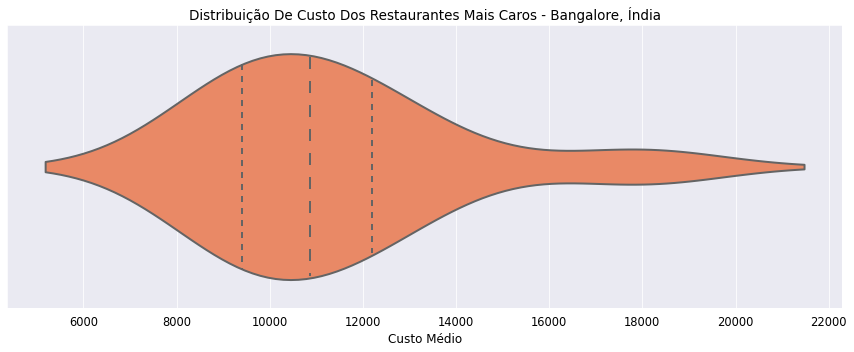

In [ ]:
# Gráfico de violino para representar a distribuição do custo médio dos restaurantes mais caros de Bangalore:
ax = sns.violinplot(data = df_restaurantes.groupby('name').agg(
    {'custo_medio': 'sum'}
).sort_values('custo_medio', ascending = False).head(10), x = 'custo_medio',
color = 'coral', linewidth = 2, scale = 'count', inner = 'quartile')
ax.set_xlabel('Custo Médio', fontsize = 12, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xticklabels([6000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000], fontsize = 11.5, color = 'k')
ax.set_title('Distribuição De Custo Dos Restaurantes Mais Caros - Bangalore, Índia', fontsize = 13.5, color = 'k')
plt.tight_layout();

### O custo dos restaurantes de Bangalore em média estão em 268 da moeda indiana (rupees).

### Os restaurantes mais baratos de Bangalore apresentam um custo de 50 rupees.

### 25% dos restaurantes em Bangalore custam abaixo de 150 rupees, 50% dos restaurantes custam abaixo de 250 rupees, já 75% dos restaurantes custam abaixo de 350 rupees.

### Os restaurantes apresentam uma dispersão de 145 rupees em relação à média do custo dos restaurantes que é de 268 rupees.

### Já os restaurantes mais custosos de Bangalore apresentam um custo entre 6000 e 22000 rupees.

## ANÁLISE EXPLORATÓRIA DE DADOS FINALIZADA.